### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

### Data

In [2]:
df = pd.read_csv('sensor.csv',index_col='timestamp',parse_dates=True)
df.index.freq = 'T'

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### Data Analysis

In [5]:
def analysis(df):
    
    
    print("------------DIMENSIONS ----------")
    print("Num of Samples:", df.shape[0], "Num of Features:", df.shape[1], "\n")

    print("--------------DTYPES------------- ")
    if len(df.select_dtypes("object").columns) > 0:
        print("Object Variables:", "\n", "variables:", 
              len(df.select_dtypes("object").columns), "\n", 
              df.select_dtypes("object").columns.tolist(), "\n")

    if len(df.select_dtypes("integer").columns) > 0:
        print("Integer Variables:", "\n", "variables:", 
              len(df.select_dtypes("integer").columns), "\n", 
              df.select_dtypes("integer").columns.tolist(), "\n")

    if len(df.select_dtypes("float").columns) > 0:
        print("Float Variables:", "\n", "variables:", 
              len(df.select_dtypes("float").columns), "\n", 
              df.select_dtypes("float").columns.tolist(), "\n")

    if len(df.select_dtypes("bool").columns) > 0:
        print("Bool Variables:", "\n", "variables:", 
              len(df.select_dtypes("bool").columns), "\n", 
              df.select_dtypes("bool").columns.tolist(), "\n")

    print("--------------MISSING VALUE----------")
    print("Is there any missing values? \n ", np.where(df.isnull().values.any() == False,  "No missing value❌", "Data includes missing value✔️"), "\n")

    buf = io.StringIO()
    df.info(buf=buf)
    info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
    print("--------------MEMORY USAGE------------ \n", info)
    
    return df

In [6]:
analysis(df)

------------DIMENSIONS ----------
Num of Samples: 220320 Num of Features: 53 

--------------DTYPES------------- 
Object Variables: 
 variables: 1 
 ['machine_status'] 

Float Variables: 
 variables: 52 
 ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51'] 

--------------MISSING VALUE----------
Is there any missing values? 
  Data includes missing value✔️ 

--------------

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL


### Missing Data

In [7]:
df.isnull().sum()

sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27
sensor_39             27


In [8]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [9]:
NAN_percentage = percent_missing(df)

In [10]:
NAN_percentage.sort_values(ascending=False)

sensor_15    100.000000
sensor_50     34.956881
sensor_51      6.982117
sensor_00      4.633261
sensor_07      2.474129
sensor_08      2.317992
sensor_06      2.177741
sensor_09      2.085603
sensor_01      0.167484
sensor_30      0.118464
sensor_29      0.032680
sensor_32      0.030864
sensor_17      0.020879
sensor_18      0.020879
sensor_22      0.018609
sensor_25      0.016340
sensor_16      0.014070
sensor_45      0.012255
sensor_43      0.012255
sensor_39      0.012255
sensor_41      0.012255
sensor_38      0.012255
sensor_42      0.012255
sensor_44      0.012255
sensor_47      0.012255
sensor_48      0.012255
sensor_46      0.012255
sensor_49      0.012255
sensor_40      0.012255
sensor_14      0.009532
sensor_26      0.009078
sensor_10      0.008624
sensor_13      0.008624
sensor_02      0.008624
sensor_11      0.008624
sensor_03      0.008624
sensor_04      0.008624
sensor_05      0.008624
sensor_12      0.008624
sensor_36      0.007262
sensor_28      0.007262
sensor_27      0

<span style="color:red"> <font size="3"> Fill in the columns with less than 10% missing data with the Mean value of each feature </span>

In [11]:
my_list = NAN_percentage[NAN_percentage<10]

In [12]:
df[my_list.index] = df[my_list.index].fillna(value=df[my_list.index].mean())

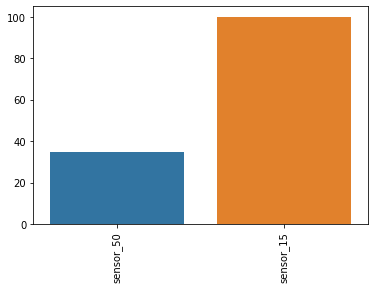

In [13]:
NAN_percentage = percent_missing(df)
sns.barplot(x=NAN_percentage.index,y=NAN_percentage)
plt.xticks(rotation=90);

<span style="color:red"> <font size="3"> Dropping the features with more than 10% missing data </span>

In [14]:
del df['sensor_15']
del df['sensor_50']

<span style="color:red"> <font size="3"> Plotting the sensor data versus the FAILURE points </span>

In [15]:
os.mkdir('Figures')
Fig_dir = os.getcwd()+'\\Figures\\'

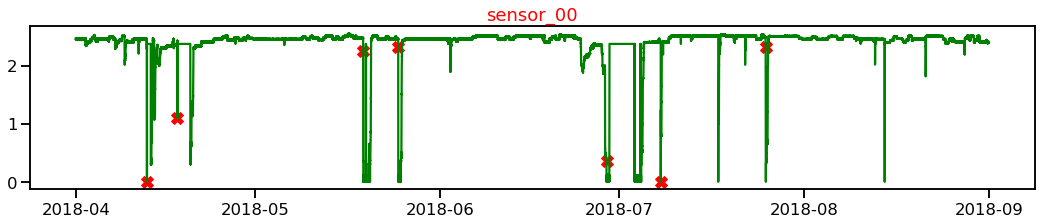

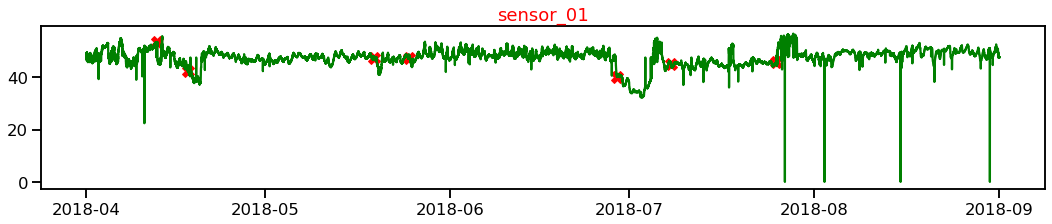

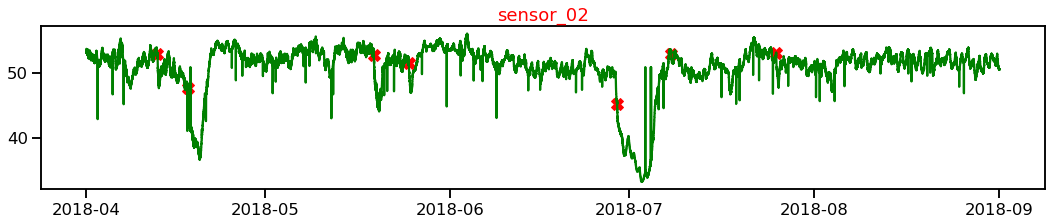

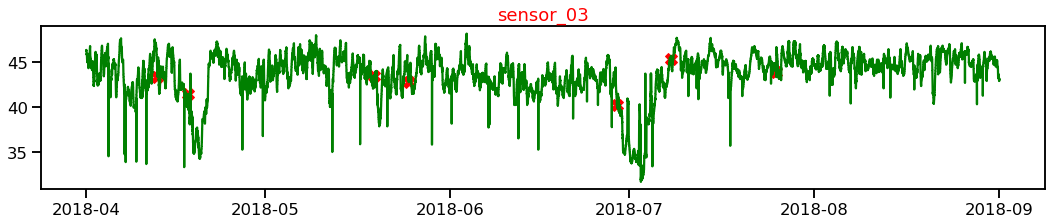

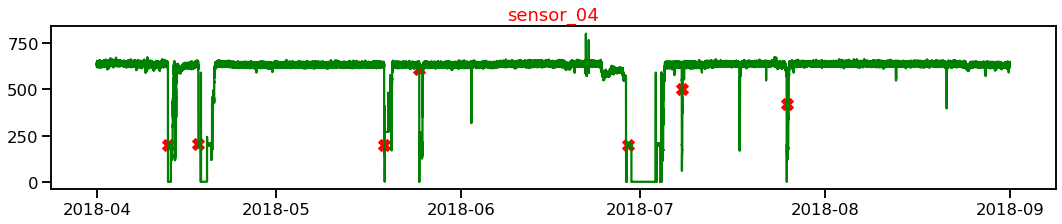

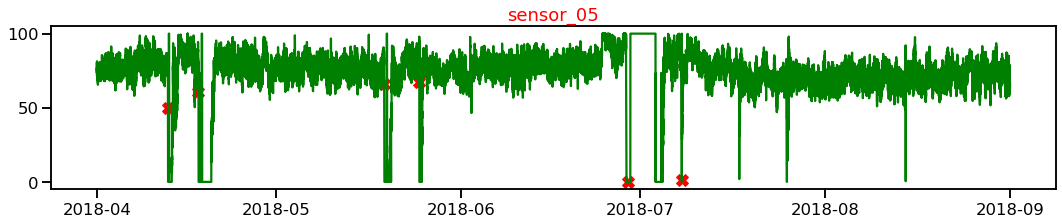

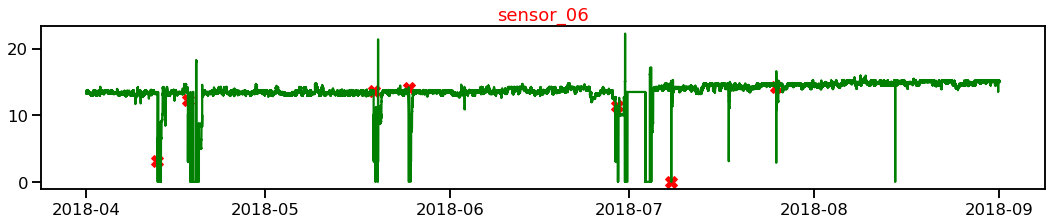

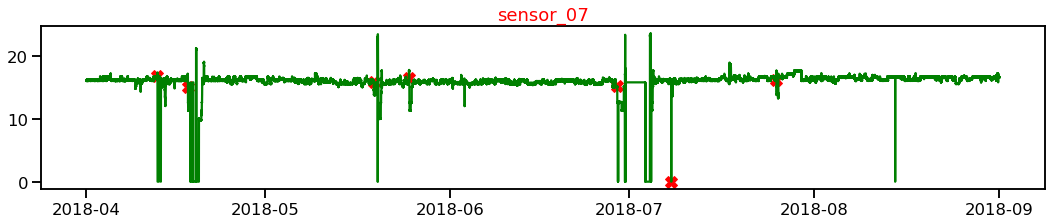

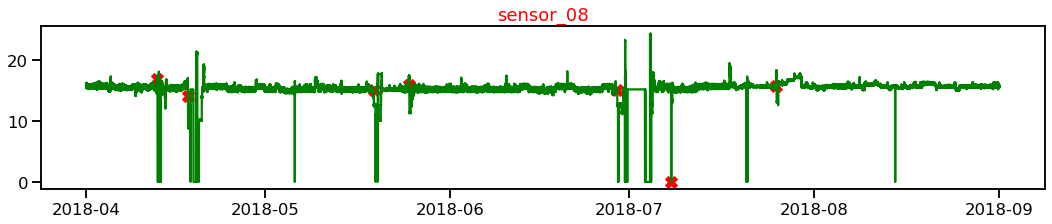

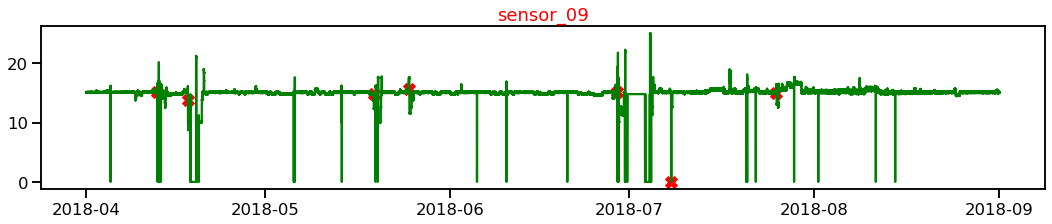

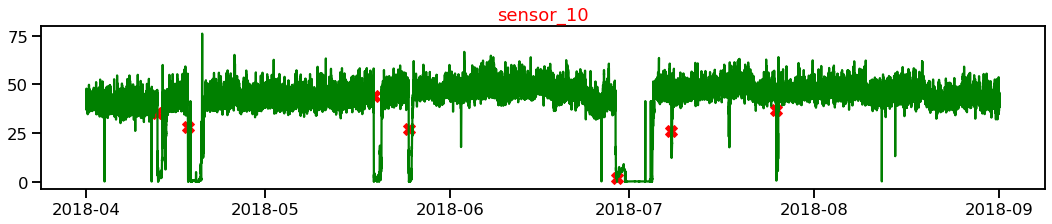

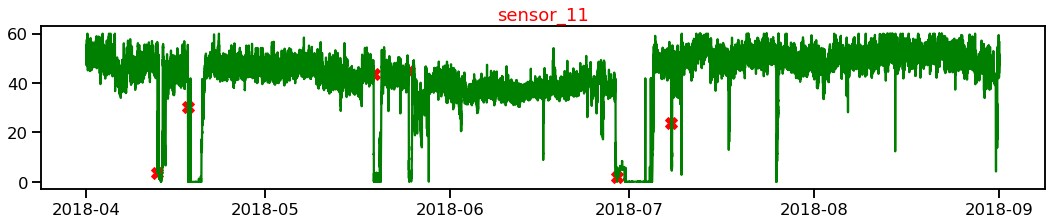

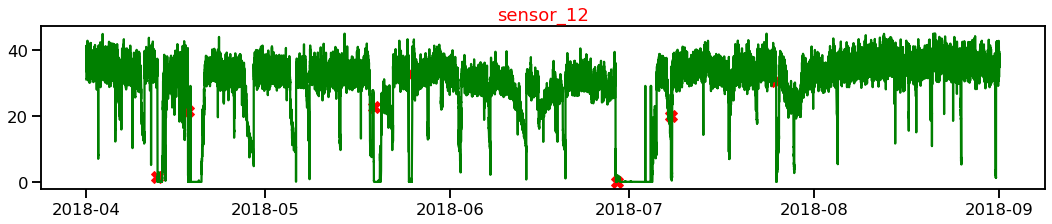

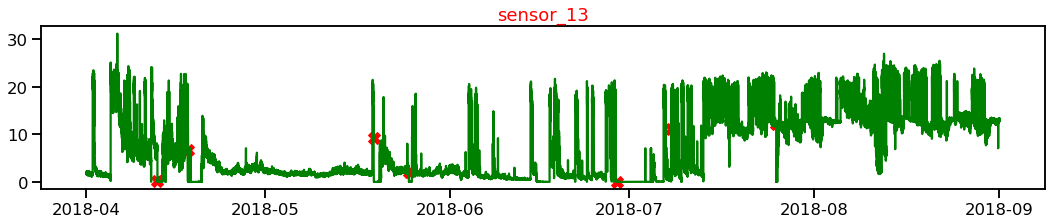

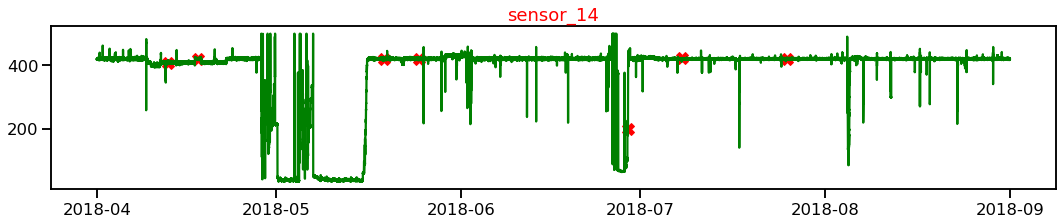

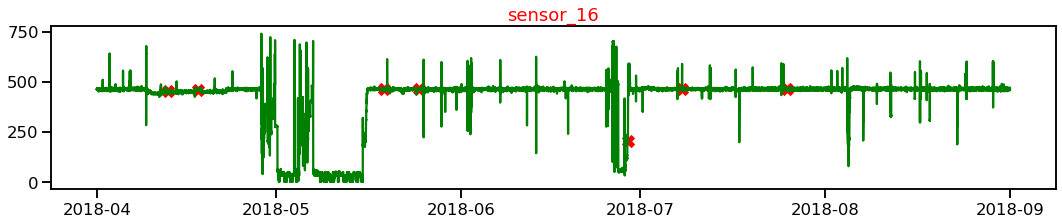

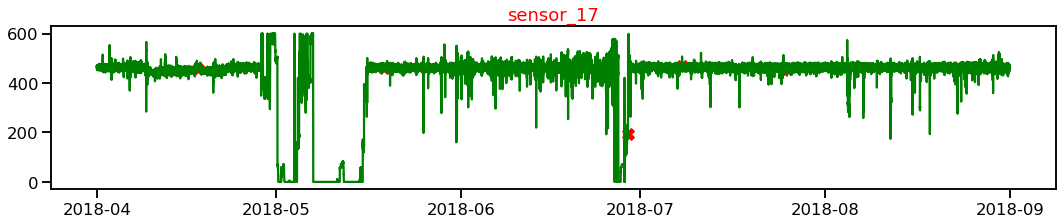

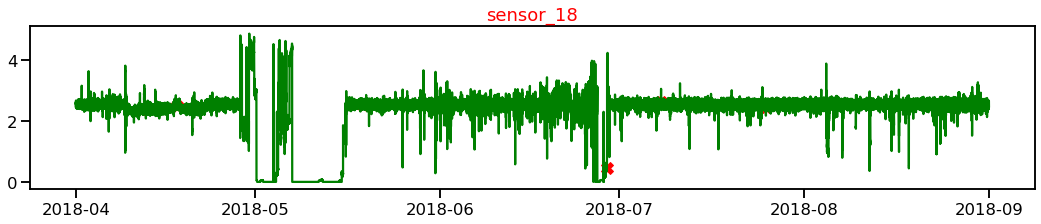

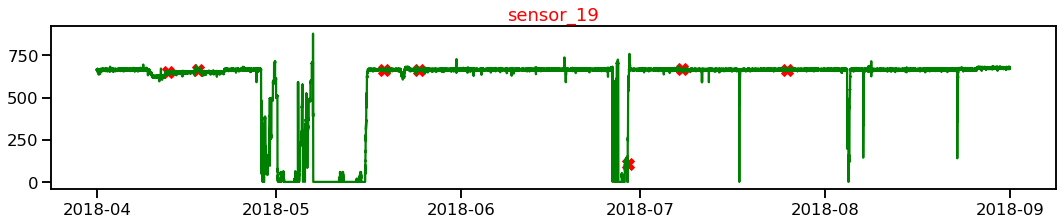

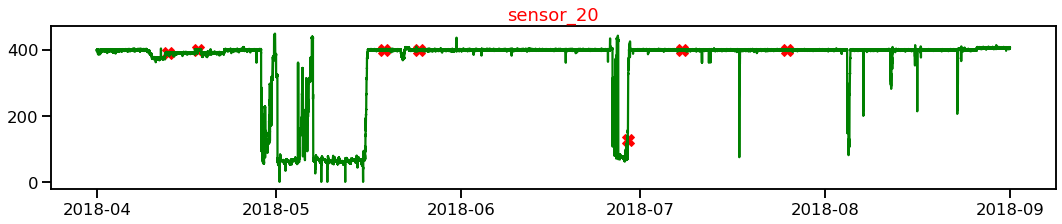

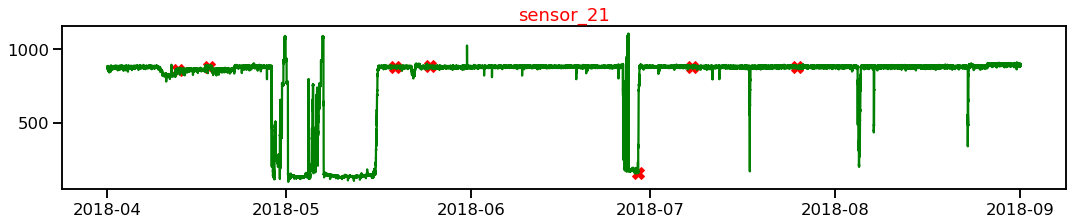

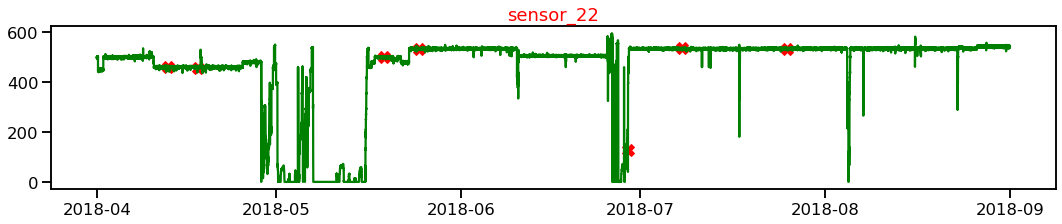

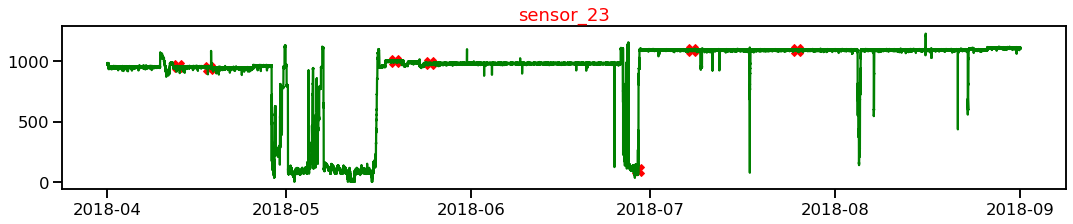

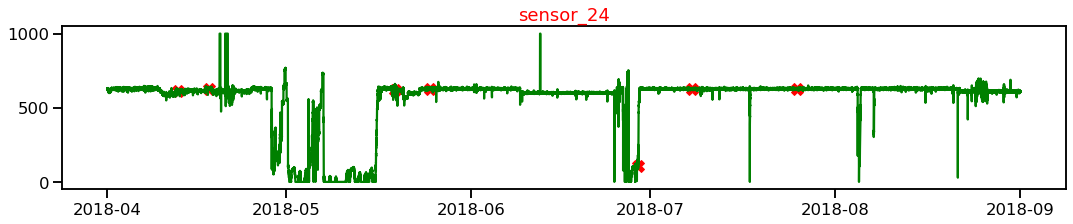

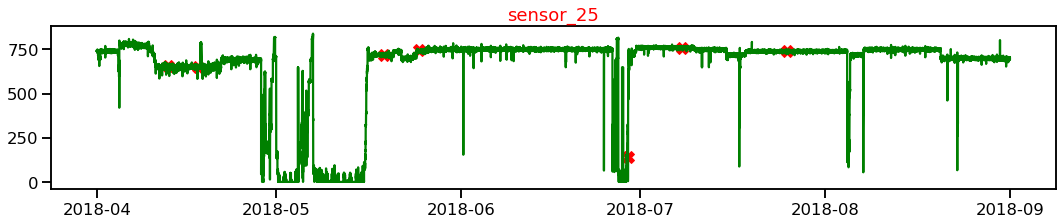

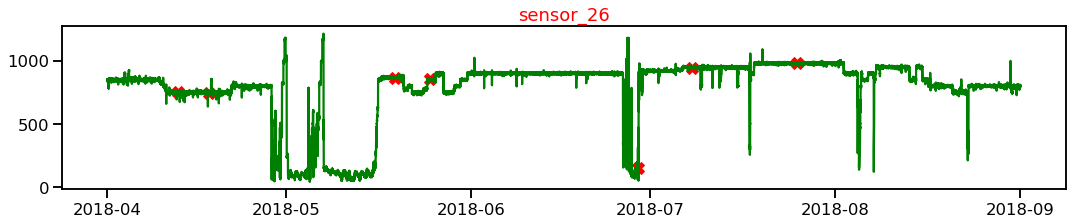

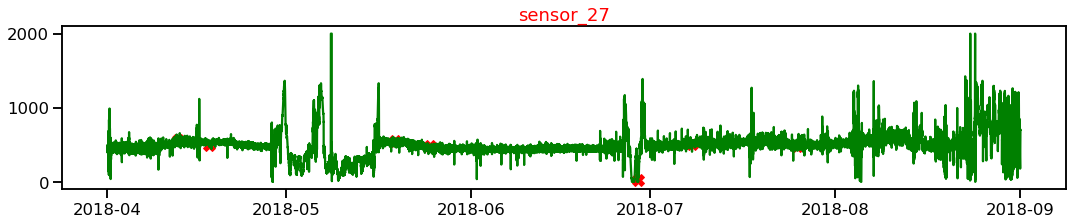

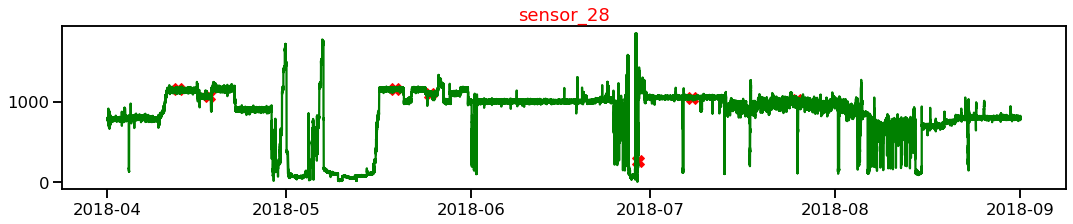

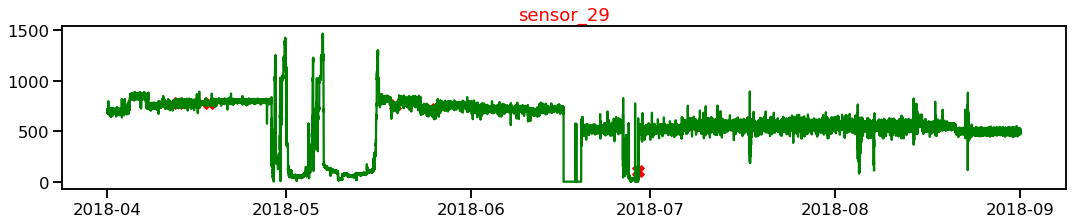

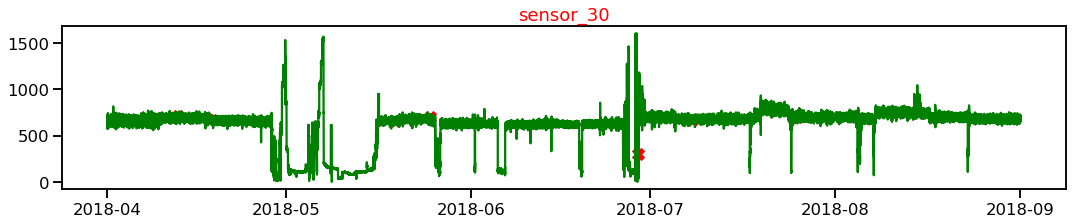

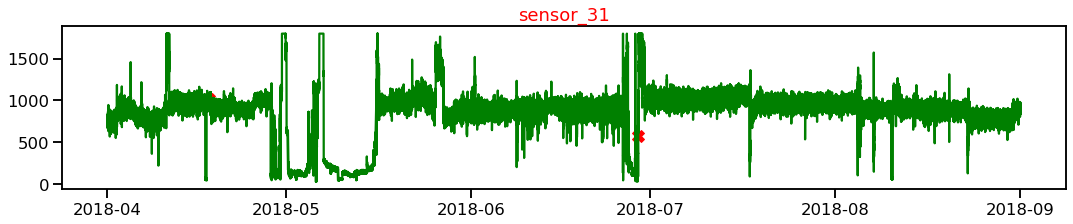

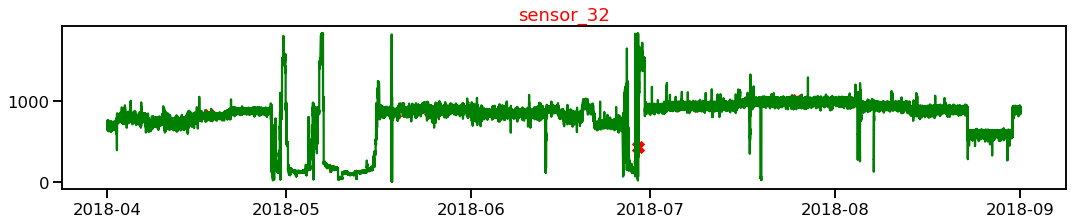

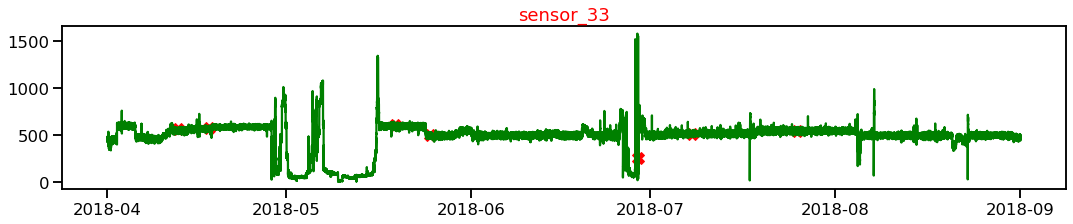

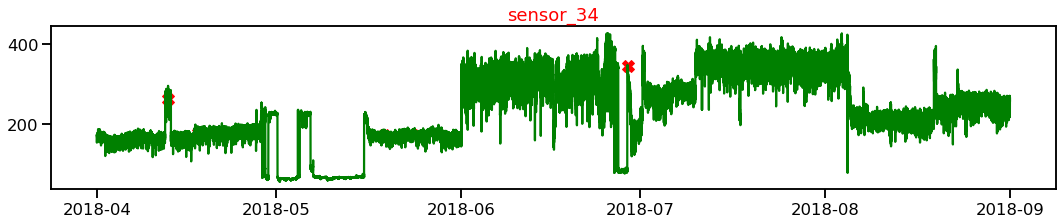

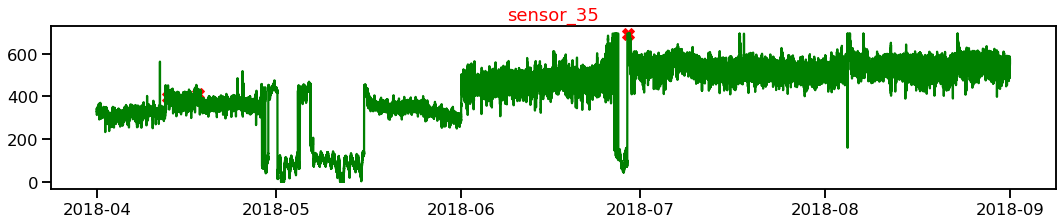

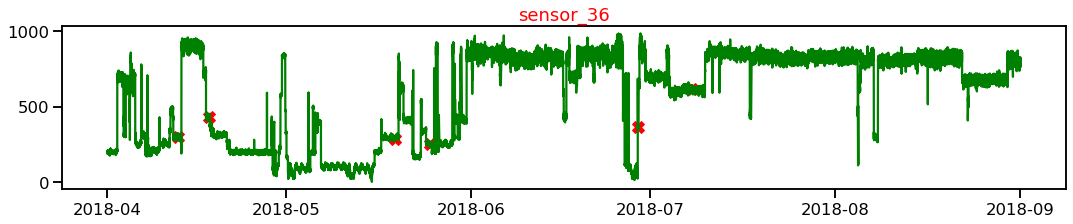

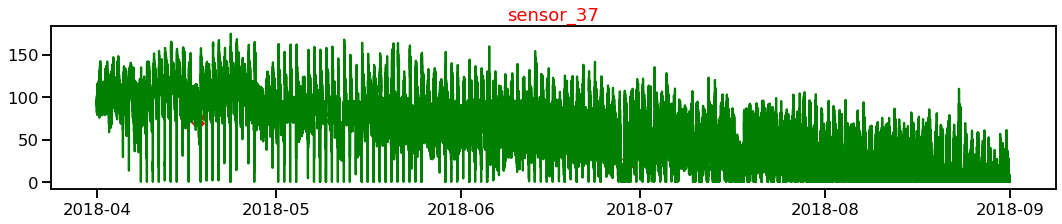

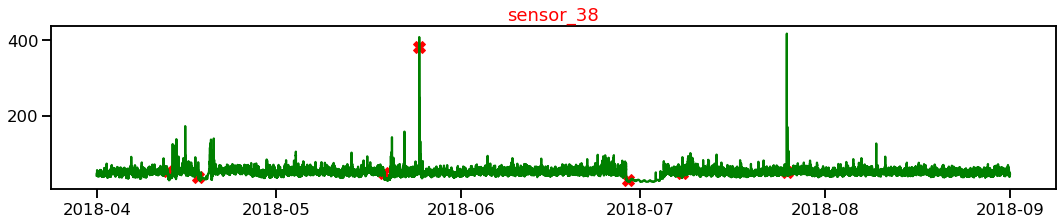

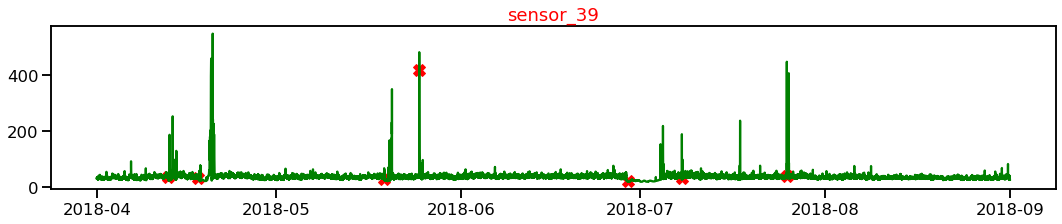

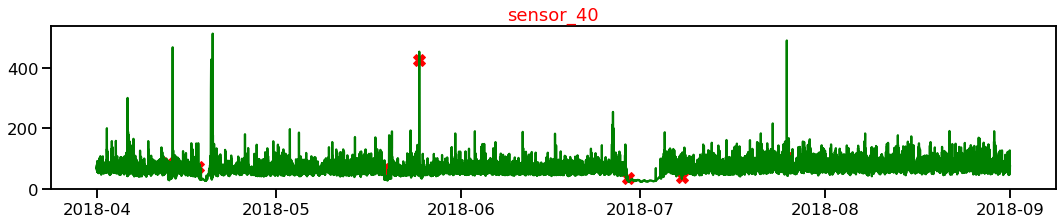

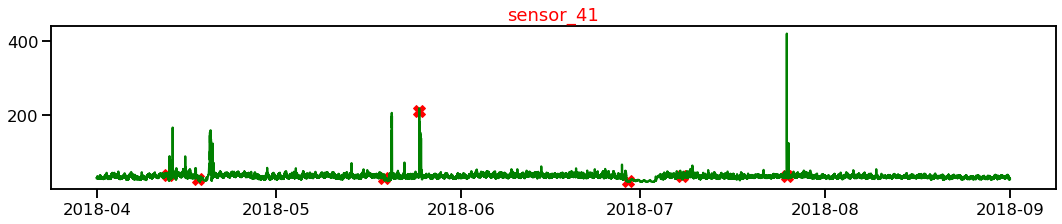

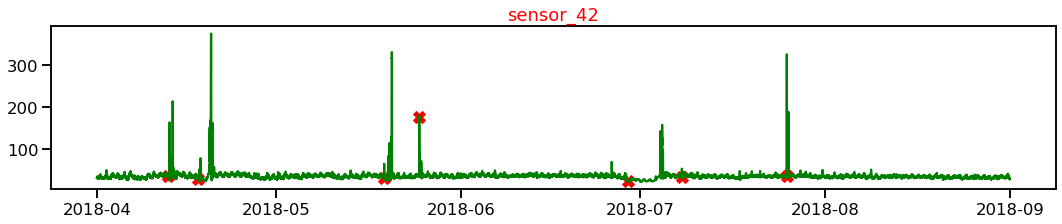

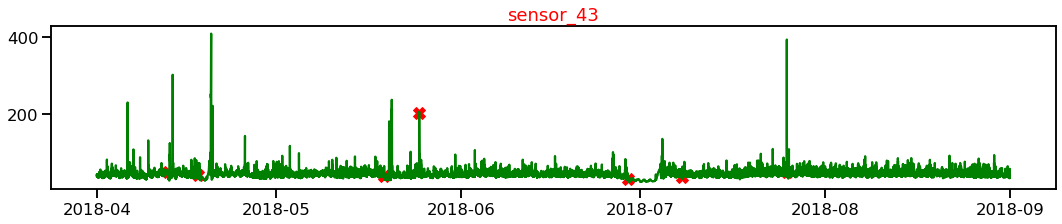

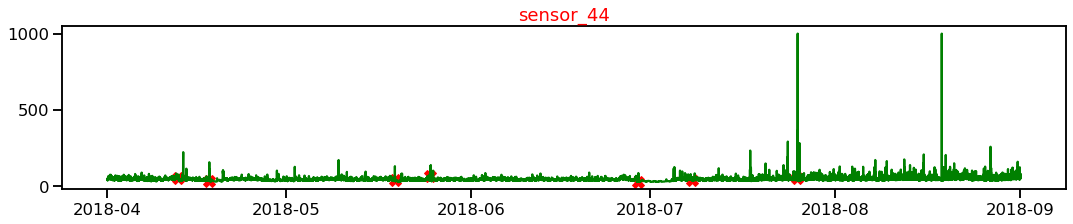

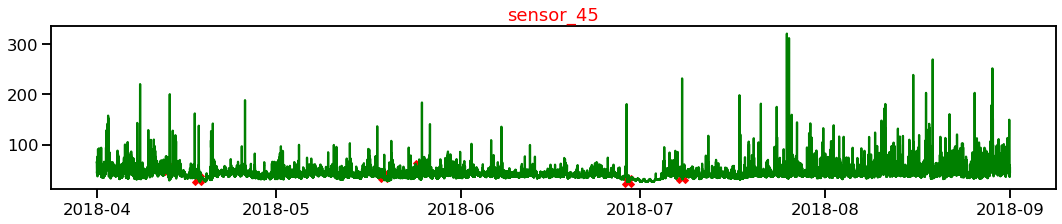

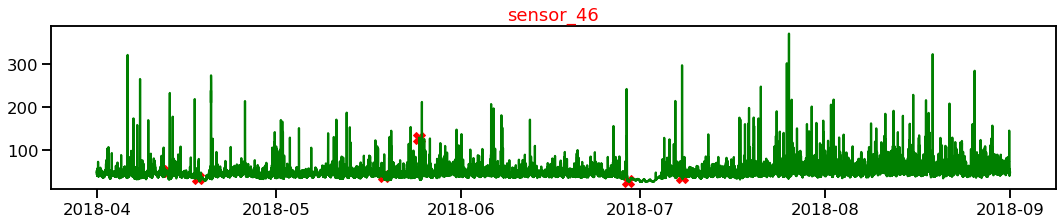

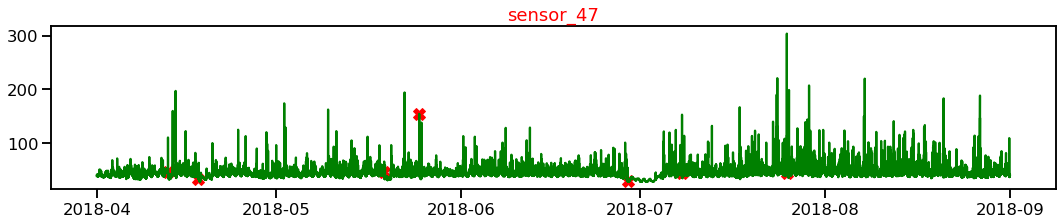

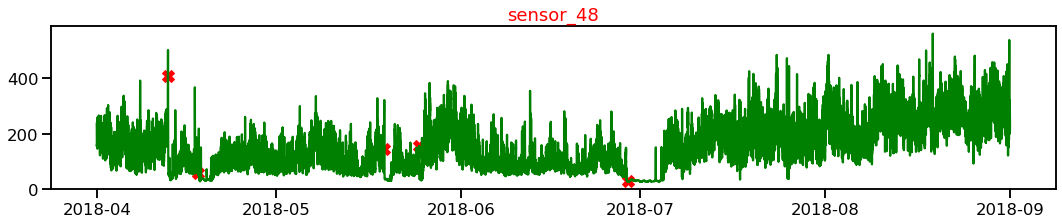

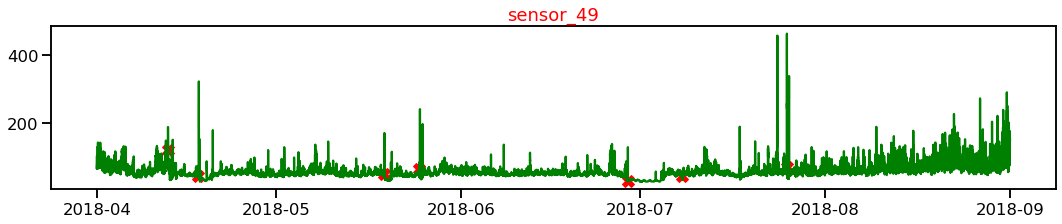

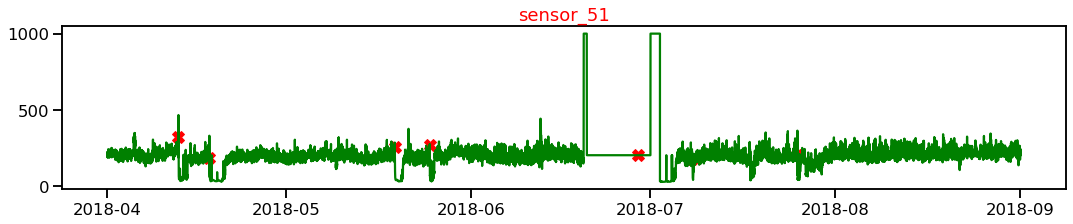

In [16]:
df_Failure = df[df['machine_status']=='BROKEN']
dfSensors = df.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_Failure[sensor], linestyle='none', marker='X', color='red', markersize=12, label='BROKEN')
    _ = plt.plot(df[sensor], color='green')
    _ = plt.title(sensor,color='red')
    plt.savefig((Fig_dir+f"{sensor}_plot.png"),bbox_inches='tight')
    #plt.savefig(f"{sensor}_plot.png",bbox_inches='tight')
    plt.show()

### Scaling Data

In [17]:
#In order to apply the anomoly detection as an UNSUPERVISED method, the "machine_status" column is dropped from the sata set. 
#Once the anomolies are detected, they will be compared with the 7 FAILURE (Broken) instances of the original dataset.
X = df.drop('machine_status',axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X = scaler.fit_transform(X)

In [21]:
scaled_X

array([[ 0.23144974, -0.15167469,  0.63938618, ...,  0.08629717,
         0.55313764, -0.0124016 ],
       [ 0.23144974, -0.15167469,  0.63938618, ...,  0.08629717,
         0.55313764, -0.0124016 ],
       [ 0.18012863, -0.07261331,  0.63938618, ...,  0.06166796,
         0.52290577,  0.0094995 ],
       ...,
       [ 0.06038102,  0.03279979, -0.09451728, ...,  0.80756778,
         5.1332136 ,  0.27778984],
       [ 0.08481941,  0.03279979, -0.09451672, ...,  0.87089969,
         5.05763784,  0.29695283],
       [ 0.06038102,  0.03279979, -0.09451672, ...,  0.93071263,
         4.87624974,  0.29695283]])

In [22]:
# checking the mean value of the columns after scaling
#scaled_X.describe()

### Dimensionality Reduction

#### In order to reduce the dataset dimension with too many features (sensors), a PCA method is applied to reduce the dimension.

In [23]:
from sklearn.decomposition import PCA

<span style="color:red"> <font size="3"> Elbow method to find the best number of components </span>

In [24]:
explained_variance = []

for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

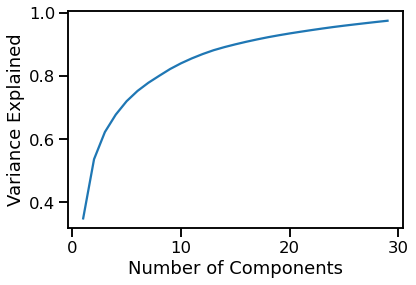

In [25]:
plt.plot(range(1,30),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [26]:
#let's pick 3 components
pca = PCA(n_components=3)

In [27]:
principal_components = pca.fit_transform(scaled_X)

In [28]:
principal_components.shape,scaled_X.shape

((220320, 3), (220320, 50))

<span style="color:red"> <font size="3"> How much variance is explained by 3 principal components? </span>

In [29]:
pca.explained_variance_ratio_

array([0.34952004, 0.18705492, 0.08605155])

In [30]:
np.sum(pca.explained_variance_ratio_)

0.6226265059338862

<span style="color:red"> <font size="3">The reduced dataframe </span>

In [31]:
df_reduced = pd.DataFrame(principal_components,index=df.index,columns=['PC1','PC2','PC3'])

In [32]:
df_reduced.head()

,PC1,PC2,PC3
timestamp,,,
2018-04-01 00:00:00,-0.046056,0.490524,-0.470246
2018-04-01 00:01:00,-0.046056,0.490524,-0.470246
2018-04-01 00:02:00,-0.186309,0.500354,-0.441183
2018-04-01 00:03:00,-0.186651,0.538034,-0.489395
2018-04-01 00:04:00,-0.142655,0.645878,-0.355112



<span style="color:red"> <font size="5"> Isolation Forest </span>

In [33]:
from sklearn.ensemble import IsolationForest

In [34]:
Vector = df_reduced.values

In [35]:
outliers_fraction = 0.001 #0.1% of the data
IsoForest_model =  IsolationForest(contamination=outliers_fraction)

In [36]:
IsoForest_model.fit(Vector)
predictions = IsoForest_model.predict(Vector)

In [37]:
#percentage of anomalies
(predictions<0).mean()

0.00099400871459695

In [38]:
abnormals_index = np.where(predictions<0)

In [39]:
dec_func = IsoForest_model.decision_function(Vector)

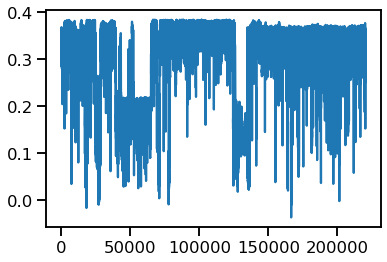

In [40]:
plt.plot(dec_func)

<span style="color:red"> <font size="3"> Plotting the PCA components versus the FAILURE points </span>

In [41]:
df_reduced['anomaly_forest'] = pd.Series(predictions,index=df_reduced.index) 

In [42]:
df_reduced['anomaly_forest'].value_counts()

 1    220101
-1       219
Name: anomaly_forest, dtype: int64

In [43]:
Fig_dir = os.getcwd()+'\\Figures\\'

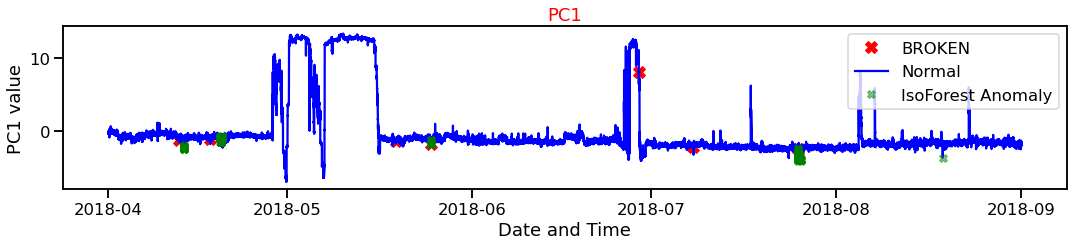

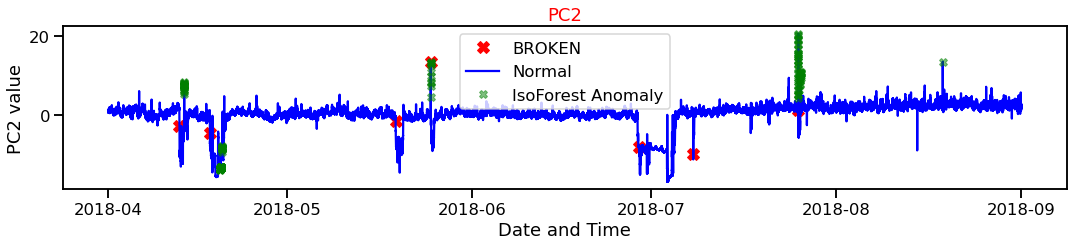

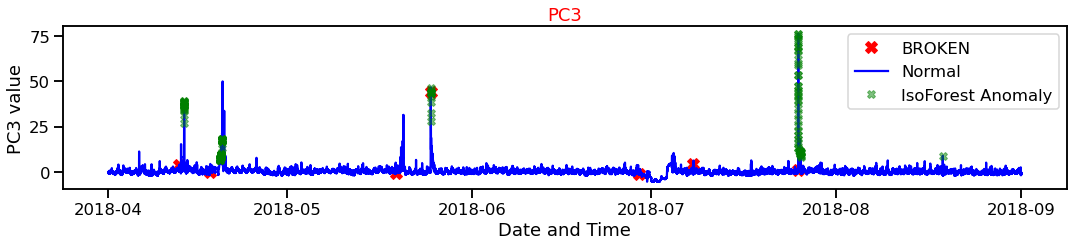

In [44]:
df_reduced['machine_status'] = df['machine_status']
df_Failure = df_reduced[df_reduced['machine_status']=='BROKEN']
temp = df_reduced.loc[df_reduced['anomaly_forest']==-1]
pcaNames=df_reduced.columns[0:3]
for components in pcaNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_Failure[components], linestyle='none', marker='X', color='red', markersize=12, label='BROKEN')
    _ = plt.plot(df_reduced[components], color='blue',label='Normal')
    _ = plt.plot(temp[components], linestyle='none', marker='X', color='green', markersize=8, label='IsoForest Anomaly', alpha=0.5)
    _ = plt.title(components)
    _ = plt.xlabel('Date and Time')
    _ = plt.ylabel(components+' ' + 'value')
    _ = plt.title(components,color='red')
    _ = plt.legend(loc='best')
    plt.savefig((Fig_dir+f"{components}_plot_IF.png"),bbox_inches='tight')
    plt.show()
    

#### 5 anomalies out of 7 BROKEN status points are detected by the model. 

### Save the model

In [45]:
import joblib

In [46]:
joblib.dump(IsoForest_model,'IsoForest_model.pkl')

['IsoForest_model.pkl']

In [47]:
X = df_reduced.drop(['machine_status','anomaly_forest'],axis=1)

In [48]:
joblib.dump(list(X.columns),'column_name.pkl')

['column_name.pkl']


<span style="color:red"> <font size="5"> OneSVM </span>

In [49]:
from sklearn.svm import OneClassSVM

In [50]:
OneSVM_model = OneClassSVM(nu=0.001, kernel="rbf", gamma=0.001)

<span style="color:red"> <font size="3">The reduced dataframe </span>

In [51]:
df_reduced = pd.DataFrame(principal_components,index=df.index,columns=['PC1','PC2','PC3'])

In [52]:
OneSVM_model.fit(df_reduced)

OneClassSVM(gamma=0.001, nu=0.001)

In [53]:
predictions = OneSVM_model.predict(df_reduced)

In [54]:
df_reduced['OneSVM'] = pd.Series(predictions,index=df_reduced.index) 

In [55]:
df_reduced['OneSVM'].value_counts()

 1    220100
-1       220
Name: OneSVM, dtype: int64

In [56]:
Fig_dir = os.getcwd()+'\\Figures\\'

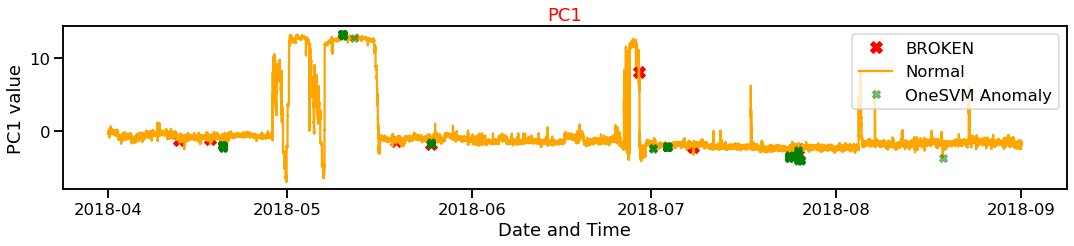

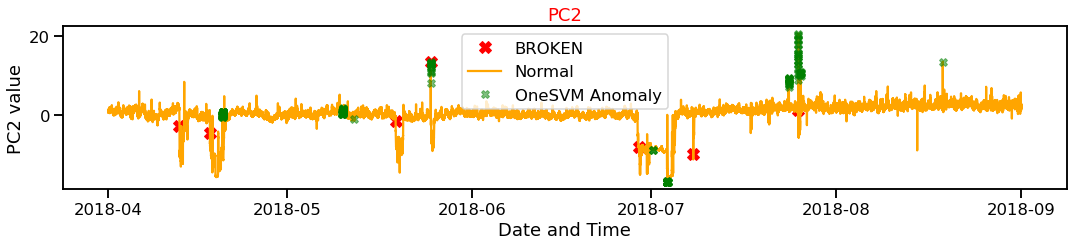

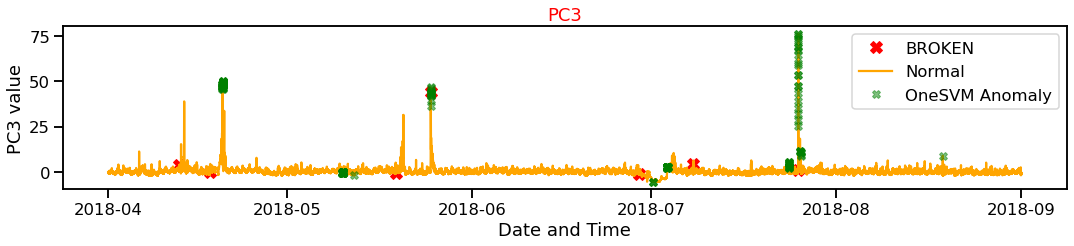

In [57]:
df_reduced['machine_status'] = df['machine_status']
df_Failure = df_reduced[df_reduced['machine_status']=='BROKEN']
temp = df_reduced.loc[df_reduced['OneSVM']==-1]
pcaNames=df_reduced.columns[0:3]
for components in pcaNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_Failure[components], linestyle='none', marker='X', color='red', markersize=12, label='BROKEN')
    _ = plt.plot(df_reduced[components], color='orange',label='Normal')
    _ = plt.plot(temp[components], linestyle='none', marker='X', color='green', markersize=8, label='OneSVM Anomaly', alpha=0.5)
    _ = plt.title(components)
    _ = plt.xlabel('Date and Time')
    _ = plt.ylabel(components+' ' + 'value')
    _ = plt.title(components,color='red')
    _ = plt.legend(loc='best')
    #plt.savefig(f"{components}_plot_SVM.png",bbox_inches='tight')
    plt.savefig((Fig_dir+f"{components}_plot_OneSVM.png"),bbox_inches='tight')
    plt.show()

#### 4 anomalies out of 7 BROKEN status points are detected by the model (one failure less than Isolation Forest). 

### Save the model

In [58]:
import joblib

In [59]:
joblib.dump(OneSVM_model,'OneSVM_model.pkl')

['OneSVM_model.pkl']

In [60]:
X = df_reduced.drop(['machine_status','OneSVM'],axis=1)

In [61]:
joblib.dump(list(X.columns),'column_name.pkl')

['column_name.pkl']